### Machine Learning - Group Project

Applying and Comparing Machine Learning Algorithms

Objective: Students are required to select one real-world problem and apply three different machine learning algorithms representing three learning paradigms:

+ Supervised Learning: e.g., Logistic Regression or Random Forest
+ Unsupervised Learning: e.g., KMeans Clustering
+ Semi-Supervised Learning: e.g., LabelPropagation

The goal is to train, evaluate, and compare these approaches on the same dataset to understand their effectiveness and limitations.

We have the original college placement dataset with another one where missing values appear

In [32]:
import pandas as pd

1) Problem Selection

Choose a real-world dataset (e.g., healthcare prediction, customer churn, text classification).

The dataset must contain both features and class labels.

We will use the following Student Placement dataset, retrieved from Kaggle. 
- Link: https://www.kaggle.com/datasets/sahilislam007/college-student-placement-factors-dataset

- Since it has no missing values, we will insert 200 of them.
- Also introduce a new column Major → A categorical column

In [33]:
# Step 1: Load the dataset
df = pd.read_csv('college_placement_missing.csv')
# Get rows and columns
"Rows:", df.shape[0], "; Columns:", df.shape[1]

('Rows:', 10200, '; Columns:', 10)

In [34]:
# Display the dataset
df

,IQ,Major,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,107.0,Finance,6.61,6.28,8.0,No,8.0,8.0,4.0,No
1,97.0,Restaurant,5.52,5.37,8.0,No,7.0,8.0,0.0,No
2,109.0,Engineering,5.36,5.83,9.0,No,3.0,1.0,1.0,No
3,122.0,Pharmacy,5.47,5.75,6.0,Yes,1.0,6.0,1.0,No
4,96.0,Finance,7.91,7.69,7.0,No,8.0,10.0,2.0,No
...,...,...,...,...,...,...,...,...,...,...
10195,106.0,Finance,5.57,7.85,3.0,No,NaN,9.0,2.0,No
10196,87.0,Pharmacy,5.56,6.78,3.0,No,3.0,NaN,2.0,No
10197,102.0,Pharmacy,8.12,9.93,2.0,Yes,6.0,2.0,4.0,Yes
10198,101.0,Finance,8.58,8.03,4.0,No,0.0,3.0,4.0,Yes


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10200 entries, 0 to 10199
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   IQ                      10190 non-null  float64
 1   Major                   10200 non-null  object 
 2   Prev_Sem_Result         10161 non-null  float64
 3   CGPA                    10179 non-null  float64
 4   Academic_Performance    10179 non-null  float64
 5   Internship_Experience   10171 non-null  object 
 6   Extra_Curricular_Score  10181 non-null  float64
 7   Communication_Skills    10162 non-null  float64
 8   Projects_Completed      10187 non-null  float64
 9   Placement               10200 non-null  object 
dtypes: float64(7), object(3)
memory usage: 797.0+ KB


In [36]:
df.describe(include='all')

,IQ,Major,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
count,10190.000000,10200,10161.000000,10179.000000,10179.000000,10171,10181.000000,10162.000000,10187.000000,10200
unique,NaN,10,NaN,NaN,NaN,2,NaN,NaN,NaN,2
top,NaN,Computer Science,NaN,NaN,NaN,No,NaN,NaN,NaN,No
freq,NaN,1068,NaN,NaN,NaN,6141,NaN,NaN,NaN,8457
mean,99.467026,NaN,7.533975,7.531891,5.553492,NaN,4.964738,5.550187,2.511829,NaN
std,15.028577,NaN,1.446908,1.470590,2.866891,NaN,3.157122,2.898182,1.716374,NaN
min,41.000000,NaN,5.000000,4.540000,1.000000,NaN,0.000000,1.000000,0.000000,NaN
25%,89.000000,NaN,6.290000,6.290000,3.000000,NaN,2.000000,3.000000,1.000000,NaN
50%,99.000000,NaN,7.560000,7.550000,6.000000,NaN,5.000000,6.000000,3.000000,NaN
75%,110.000000,NaN,8.780000,8.775000,8.000000,NaN,8.000000,8.000000,4.000000,NaN


In [37]:
df['IQ'].describe()

count    10190.000000
mean        99.467026
std         15.028577
min         41.000000
25%         89.000000
50%         99.000000
75%        110.000000
max        158.000000
Name: IQ, dtype: float64

In [38]:
df['Placement'].describe(include='all')

count     10200
unique        2
top          No
freq       8457
Name: Placement, dtype: object

Data Exploring and Visualization

In [39]:
columns = ['IQ', 'Prev_Sem_Result', 'CGPA', 'Academic_Performance', 'Extra_Curricular_Score']
for i in columns:
    print(f"Mean of {i}:", df[i].mean())

Mean of IQ: 99.46702649656525
Mean of Prev_Sem_Result: 7.533975002460388
Mean of CGPA: 7.531891148442872
Mean of Academic_Performance: 5.553492484526967
Mean of Extra_Curricular_Score: 4.9647382378941165


In [40]:
df['Major'].value_counts()

Major
Computer Science    1068
Education           1062
Design              1040
Finance             1035
Psychology          1020
Marketing           1016
Business            1008
Restaurant           995
Engineering          980
Pharmacy             976
Name: count, dtype: int64

<Axes: xlabel='Academic_Performance', ylabel='CGPA'>

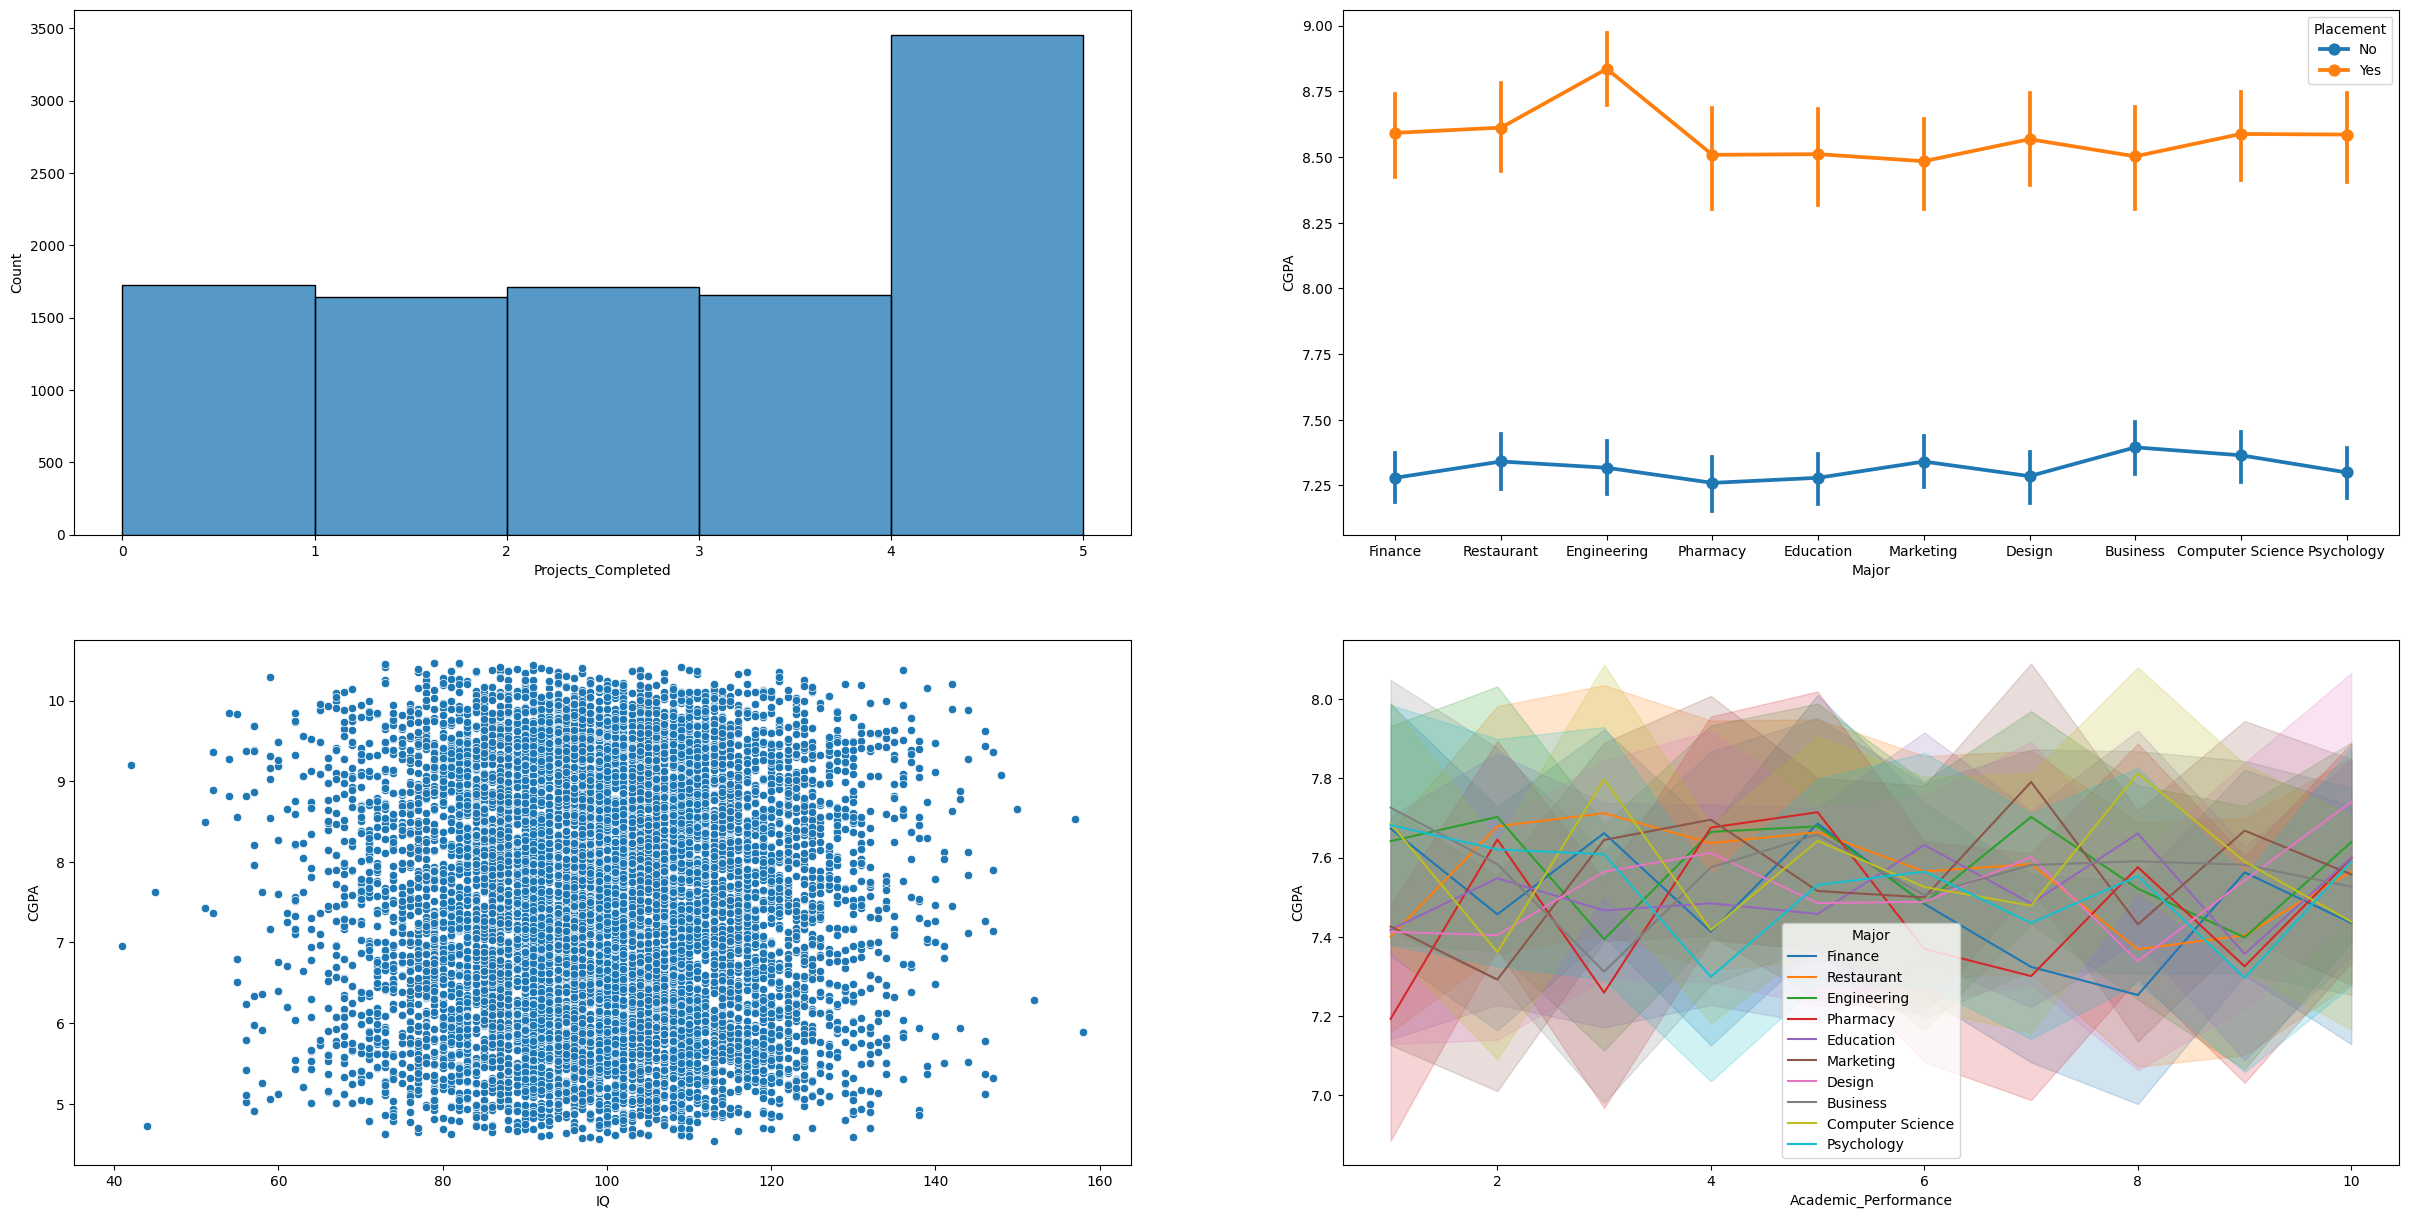

In [41]:
# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(30, 15))
sns.histplot(df['Projects_Completed'], bins=5, ax=axs[0, 0])
sns.pointplot(data=df, x='Major', y='CGPA', hue='Placement', ax=axs[0, 1])
sns.scatterplot(data=df, x='IQ', y='CGPA', ax=axs[1, 0])
sns.lineplot(data=df, x='Academic_Performance', y='CGPA', hue='Major', ax=axs[1, 1])

2) Data Preparation

Handle missing values, normalize or scale numerical features, and encode categorical variables.
Split data into training and testing sets (for supervised and semi-supervised learning).

In [42]:
# Display columns with missing values
"Missing values in each column:", df.isnull().sum()

('Missing values in each column:',
 IQ                        10
 Major                      0
 Prev_Sem_Result           39
 CGPA                      21
 Academic_Performance      21
 Internship_Experience     29
 Extra_Curricular_Score    19
 Communication_Skills      38
 Projects_Completed        13
 Placement                  0
 dtype: int64)

In [43]:
target = 'Placement'
# Display the numerical columns
print("Numerical columns in the dataset:")
number_cols = df.select_dtypes(include=['number']).columns
print(number_cols.tolist())
# Display the categorical column names
print("Categorical columns in the dataset:")
object_cols = df.select_dtypes(include=['object']).columns
print(object_cols.tolist())

Numerical columns in the dataset:
['IQ', 'Prev_Sem_Result', 'CGPA', 'Academic_Performance', 'Extra_Curricular_Score', 'Communication_Skills', 'Projects_Completed']
Categorical columns in the dataset:
['Major', 'Internship_Experience', 'Placement']


For Categorical Variables (Binary Output like 0/1), fill in the missing values with Mode

In [44]:
# Fill in Binary Categorical Columns with Mode
# Select binary columns
# binary_cols = df[object_cols].unique().isin(['No', 'Yes'])
multi_cols = []
binary_cols = []
for i in object_cols:
    # Filter out the non-target column with binary values
    if 'No' in df[i].unique() and 'Yes' in df[i].unique() and i != target:
        binary_cols.append(i)
    elif i != target:
        multi_cols.append(i)

print("Binary Columns:", binary_cols)
print("Multi-Class Columns:", multi_cols)
# Now, impute using mode
for j in binary_cols:
    df[j] = df[j].fillna(df[j].mode().iloc[0])

# See the df
df

Binary Columns: ['Internship_Experience']
Multi-Class Columns: ['Major']


,IQ,Major,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,107.0,Finance,6.61,6.28,8.0,No,8.0,8.0,4.0,No
1,97.0,Restaurant,5.52,5.37,8.0,No,7.0,8.0,0.0,No
2,109.0,Engineering,5.36,5.83,9.0,No,3.0,1.0,1.0,No
3,122.0,Pharmacy,5.47,5.75,6.0,Yes,1.0,6.0,1.0,No
4,96.0,Finance,7.91,7.69,7.0,No,8.0,10.0,2.0,No
...,...,...,...,...,...,...,...,...,...,...
10195,106.0,Finance,5.57,7.85,3.0,No,NaN,9.0,2.0,No
10196,87.0,Pharmacy,5.56,6.78,3.0,No,3.0,NaN,2.0,No
10197,102.0,Pharmacy,8.12,9.93,2.0,Yes,6.0,2.0,4.0,Yes
10198,101.0,Finance,8.58,8.03,4.0,No,0.0,3.0,4.0,Yes


For Integer Variables, we also fill in the missing values with Mode

However, if the column is primarily integer but contains missing values (NaN), pandas consider this column a float -> Nullable integer, we need to impute these with mode

In [45]:
discrete_cols = []

for i in number_cols:
    # To get nullable integer, we can try convert them into one
    try:
        df[i].astype('Int64')
        # If this conversion succeeds, the column is integer
    except TypeError:
        # Skip through and continue
        continue
    else:
        discrete_cols.append(i)

print("Nullable Integers:", discrete_cols)

# Now, impute these with mode
for j in discrete_cols:
    df[j] = df[j].fillna(df[j].mode().iloc[0])

# After imputing, ensure the columns remain as integers
for j in discrete_cols:
    df[j] = df[j].astype('int64')

df

Nullable Integers: ['IQ', 'Academic_Performance', 'Extra_Curricular_Score', 'Communication_Skills', 'Projects_Completed']


,IQ,Major,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,107,Finance,6.61,6.28,8,No,8,8,4,No
1,97,Restaurant,5.52,5.37,8,No,7,8,0,No
2,109,Engineering,5.36,5.83,9,No,3,1,1,No
3,122,Pharmacy,5.47,5.75,6,Yes,1,6,1,No
4,96,Finance,7.91,7.69,7,No,8,10,2,No
...,...,...,...,...,...,...,...,...,...,...
10195,106,Finance,5.57,7.85,3,No,3,9,2,No
10196,87,Pharmacy,5.56,6.78,3,No,3,10,2,No
10197,102,Pharmacy,8.12,9.93,2,Yes,6,2,4,Yes
10198,101,Finance,8.58,8.03,4,No,0,3,4,Yes


In [46]:
# Now we have the binary columns imputed, we can map them to 0 and 1
for k in binary_cols:
    df[k] = df[k].map({'No': 0, 'Yes': 1})
# ALso label encode the target column
df[target] = df[target].map({'No': 0, 'Yes': 1})
df

,IQ,Major,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,107,Finance,6.61,6.28,8,0,8,8,4,0
1,97,Restaurant,5.52,5.37,8,0,7,8,0,0
2,109,Engineering,5.36,5.83,9,0,3,1,1,0
3,122,Pharmacy,5.47,5.75,6,1,1,6,1,0
4,96,Finance,7.91,7.69,7,0,8,10,2,0
...,...,...,...,...,...,...,...,...,...,...
10195,106,Finance,5.57,7.85,3,0,3,9,2,0
10196,87,Pharmacy,5.56,6.78,3,0,3,10,2,0
10197,102,Pharmacy,8.12,9.93,2,1,6,2,4,1
10198,101,Finance,8.58,8.03,4,0,0,3,4,1


In [47]:
# Now, we impute the remaining with mean (likely numerical)
# These columns do not show up in discrete_cols or binary_cols
remaining_cols = df.columns.difference(discrete_cols + binary_cols + multi_cols + [target])
# Drop the Major columns (critical to avoid imputation error)
print("Remaining Columns:", remaining_cols.to_list())
for k in remaining_cols:
    df[k] = df[k].fillna(df[k].mean())

df

Remaining Columns: ['CGPA', 'Prev_Sem_Result']


,IQ,Major,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,107,Finance,6.61,6.28,8,0,8,8,4,0
1,97,Restaurant,5.52,5.37,8,0,7,8,0,0
2,109,Engineering,5.36,5.83,9,0,3,1,1,0
3,122,Pharmacy,5.47,5.75,6,1,1,6,1,0
4,96,Finance,7.91,7.69,7,0,8,10,2,0
...,...,...,...,...,...,...,...,...,...,...
10195,106,Finance,5.57,7.85,3,0,3,9,2,0
10196,87,Pharmacy,5.56,6.78,3,0,3,10,2,0
10197,102,Pharmacy,8.12,9.93,2,1,6,2,4,1
10198,101,Finance,8.58,8.03,4,0,0,3,4,1


In [48]:
# Display columns with missing values
"Missing values in each column:", df.isnull().sum()

('Missing values in each column:',
 IQ                        0
 Major                     0
 Prev_Sem_Result           0
 CGPA                      0
 Academic_Performance      0
 Internship_Experience     0
 Extra_Curricular_Score    0
 Communication_Skills      0
 Projects_Completed        0
 Placement                 0
 dtype: int64)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10200 entries, 0 to 10199
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   IQ                      10200 non-null  int64  
 1   Major                   10200 non-null  object 
 2   Prev_Sem_Result         10200 non-null  float64
 3   CGPA                    10200 non-null  float64
 4   Academic_Performance    10200 non-null  int64  
 5   Internship_Experience   10200 non-null  int64  
 6   Extra_Curricular_Score  10200 non-null  int64  
 7   Communication_Skills    10200 non-null  int64  
 8   Projects_Completed      10200 non-null  int64  
 9   Placement               10200 non-null  int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 797.0+ KB


One-Hot Encoding

In [50]:
# One Hot Encoding for Major, ignore nan, mapping them to 0 for False and 1 for True
df = pd.get_dummies(df, columns=['Major'], dummy_na=False).replace({True: 1, False: 0})
df

/var/folders/gc/49grx5f90nv3f12yh4jhhf740000gn/T/ipykernel_83769/2831691126.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = pd.get_dummies(df, columns=['Major'], dummy_na=False).replace({True: 1, False: 0})


,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement,Major_Business,Major_Computer Science,Major_Design,Major_Education,Major_Engineering,Major_Finance,Major_Marketing,Major_Pharmacy,Major_Psychology,Major_Restaurant
0,107,6.61,6.28,8,0,8,8,4,0,0,0,0,0,0,1,0,0,0,0
1,97,5.52,5.37,8,0,7,8,0,0,0,0,0,0,0,0,0,0,0,1
2,109,5.36,5.83,9,0,3,1,1,0,0,0,0,0,1,0,0,0,0,0
3,122,5.47,5.75,6,1,1,6,1,0,0,0,0,0,0,0,0,1,0,0
4,96,7.91,7.69,7,0,8,10,2,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10195,106,5.57,7.85,3,0,3,9,2,0,0,0,0,0,0,1,0,0,0,0
10196,87,5.56,6.78,3,0,3,10,2,0,0,0,0,0,0,0,0,1,0,0
10197,102,8.12,9.93,2,1,6,2,4,1,0,0,0,0,0,0,0,1,0,0
10198,101,8.58,8.03,4,0,0,3,4,1,0,0,0,0,0,1,0,0,0,0


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10200 entries, 0 to 10199
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   IQ                      10200 non-null  int64  
 1   Prev_Sem_Result         10200 non-null  float64
 2   CGPA                    10200 non-null  float64
 3   Academic_Performance    10200 non-null  int64  
 4   Internship_Experience   10200 non-null  int64  
 5   Extra_Curricular_Score  10200 non-null  int64  
 6   Communication_Skills    10200 non-null  int64  
 7   Projects_Completed      10200 non-null  int64  
 8   Placement               10200 non-null  int64  
 9   Major_Business          10200 non-null  int64  
 10  Major_Computer Science  10200 non-null  int64  
 11  Major_Design            10200 non-null  int64  
 12  Major_Education         10200 non-null  int64  
 13  Major_Engineering       10200 non-null  int64  
 14  Major_Finance           10200 non-null

Normalization with Z-Score

In [52]:
from sklearn.preprocessing import StandardScaler

# Apply on number columns (keep all the features scale equal)
scaler = StandardScaler()
df[number_cols] = scaler.fit_transform(df[number_cols])
df

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement,Major_Business,Major_Computer Science,Major_Design,Major_Education,Major_Engineering,Major_Finance,Major_Marketing,Major_Pharmacy,Major_Psychology,Major_Restaurant
0,0.501544,-0.639842,-0.852205,0.848991,0,0.963158,0.837513,0.864633,0,0,0,0,0,0,1,0,0,0,0
1,-0.164214,-1.394653,-1.471672,0.848991,0,0.646218,0.837513,-1.464345,0,0,0,0,0,0,0,0,0,0,1
2,0.634696,-1.505452,-1.158535,1.197316,0,-0.621546,-1.571867,-0.882101,0,0,0,0,0,1,0,0,0,0,0
3,1.500181,-1.429278,-1.212994,0.152341,1,-1.255427,0.149118,-0.882101,0,0,0,0,0,0,0,0,1,0,0
4,-0.230789,0.260393,0.107630,0.500666,0,0.963158,1.525907,-0.299856,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10195,0.434968,-1.360029,0.216547,-0.892634,0,-0.621546,1.181710,-0.299856,0,0,0,0,0,0,1,0,0,0,0
10196,-0.829971,-1.366954,-0.511838,-0.892634,0,-0.621546,1.525907,-0.299856,0,0,0,0,0,0,0,0,1,0,0
10197,0.168665,0.405815,1.632474,-1.240960,1,0.329277,-1.227670,0.864633,1,0,0,0,0,0,0,0,1,0,0
10198,0.102089,0.724360,0.339080,-0.544309,0,-1.572368,-0.883473,0.864633,1,0,0,0,0,0,1,0,0,0,0


In [53]:
# Summary table (only mean and std) using describe
df.describe().T[['mean', 'std']]

,mean,std
IQ,-1.316594e-16,1.000049
Prev_Sem_Result,3.120815e-16,1.000049
CGPA,-2.856103e-16,1.000049
Academic_Performance,4.667291e-17,1.000049
Internship_Experience,3.950980e-01,0.488896
Extra_Curricular_Score,8.080682e-17,1.000049
Communication_Skills,1.114577e-16,1.000049
Projects_Completed,-8.777293e-17,1.000049
Placement,1.708824e-01,0.376425
Major_Business,9.882353e-02,0.298440


Split the data into 80% Training and 20% Testing

In [54]:
from sklearn.model_selection import train_test_split

target = 'Placement'
features = df.columns.drop(target)

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
X_train = train_df[features]
y_train = train_df[target]
X_test = test_df[features]
y_test = test_df[target]

print("Training Set shape:", train_df.shape)
print("Testing Set shape:", test_df.shape)

train_df

Training Set shape: (8160, 19)
Testing Set shape: (2040, 19)


,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement,Major_Business,Major_Computer Science,Major_Design,Major_Education,Major_Engineering,Major_Finance,Major_Marketing,Major_Pharmacy,Major_Psychology,Major_Restaurant
9306,0.834423,0.468139,0.563722,0.848991,0,-0.621546,0.149118,0.864633,1,0,0,0,0,0,0,0,0,0,1
8697,-1.429153,-0.584443,-0.259966,-0.892634,1,0.329277,-1.571867,0.282389,0,0,0,0,0,0,0,1,0,0,0
6045,-0.430517,1.056754,0.944933,0.848991,1,0.646218,-1.571867,0.282389,0,0,0,0,0,0,0,1,0,0,0
4929,-0.164214,-1.353104,-1.097269,-1.589285,0,0.329277,1.181710,-1.464345,0,0,0,0,0,0,0,0,0,1,0
4196,1.100726,-0.445945,-0.232737,1.197316,1,-1.572368,-1.571867,1.446878,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,-0.563668,1.659219,1.489520,0.152341,0,0.963158,0.837513,-0.882101,0,0,0,0,0,0,0,1,0,0,0
5191,-0.031062,0.142670,-0.117012,1.197316,0,0.646218,1.525907,-1.464345,0,0,0,0,0,1,0,0,0,0,0
5390,-0.696820,-0.321297,-0.593526,-1.589285,1,1.597040,-1.571867,1.446878,0,0,0,0,0,0,0,0,1,0,0
860,0.235241,0.142670,0.025942,-0.544309,0,0.963158,-0.883473,-0.299856,0,1,0,0,0,0,0,0,0,0,0


**3. Model Training & Testing**

- **Supervised Learning**: Train a classifier (Logistic Regression, Random Forest, or equivalent).
- **Unsupervised Learning**: Apply clustering (KMeans) and map clusters to labels for evaluation.
- **Semi-Supervised Learning**: Hide a portion of the labels and apply LabelPropagation to infer missing labels.

**4. Evaluation Metrics**

- **Supervised & Semi-supervised**: Accuracy, Precision, Recall, F1-score.
- **Unsupervised**: Silhouette Score, Adjusted Rand Index (ARI).

We will train three supervised models for this dataset (Logistic Regression, Random Forest, and Gradient Boosting). Then compare its metrics to see which one is better overall

In [55]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def train_evaluate_model(model, name):
    print("Model:", name)
    # Fit the model
    model.fit(X_train, y_train)
    # Make prediction
    y_pred = model.predict(X_test)
    # Model evaluation
    conf_matrix = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1score = f1_score(y_test, y_pred)
    print(f"Confusion Matrix:\n {conf_matrix}\nAccuracy: {accuracy} "
          f"\nPrecision: {precision} \nRecall {recall} \nF1-Score {f1score}")
    # Return a dictionary
    return conf_matrix, {"Model": name, "Accuracy": accuracy, "Precision": precision,
            "Recall": recall, "F1-Score": f1score}

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

models = {LogisticRegression(solver='liblinear', random_state=42): 'Logistic Regression',
          DecisionTreeClassifier(criterion='entropy', random_state=42): 'Decision Tree',
             RandomForestClassifier(n_estimators=100, random_state=42): "Random Forest",
             GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5,
                                        random_state=42): "Gradient Boosting"}
results = []
cfm_results = []
for key, value in models.items():
    cfm, res = train_evaluate_model(key, value)
    print()
    results.append(res)
    cfm_results.append(cfm)
    
# Summary:
for i in results:
    print(i)

Model: Logistic Regression
Confusion Matrix:
 [[1621   85]
 [ 144  190]]
Accuracy: 0.8877450980392156 
Precision: 0.6909090909090909 
Recall 0.5688622754491018 
F1-Score 0.6239737274220033

Model: Decision Tree
Confusion Matrix:
 [[1693   13]
 [   7  327]]
Accuracy: 0.9901960784313726 
Precision: 0.961764705882353 
Recall 0.9790419161676647 
F1-Score 0.9703264094955489

Model: Random Forest
Confusion Matrix:
 [[1704    2]
 [   7  327]]
Accuracy: 0.9955882352941177 
Precision: 0.993920972644377 
Recall 0.9790419161676647 
F1-Score 0.9864253393665159

Model: Gradient Boosting
Confusion Matrix:
 [[1700    6]
 [   7  327]]
Accuracy: 0.9936274509803922 
Precision: 0.9819819819819819 
Recall 0.9790419161676647 
F1-Score 0.9805097451274363

{'Model': 'Logistic Regression', 'Accuracy': 0.8877450980392156, 'Precision': 0.6909090909090909, 'Recall': 0.5688622754491018, 'F1-Score': 0.6239737274220033}
{'Model': 'Decision Tree', 'Accuracy': 0.9901960784313726, 'Precision': 0.961764705882353, 'Reca

Visualize the metrics

                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.887745   0.690909  0.568862  0.623974
1        Decision Tree  0.990196   0.961765  0.979042  0.970326
2        Random Forest  0.995588   0.993921  0.979042  0.986425
3    Gradient Boosting  0.993627   0.981982  0.979042  0.980510


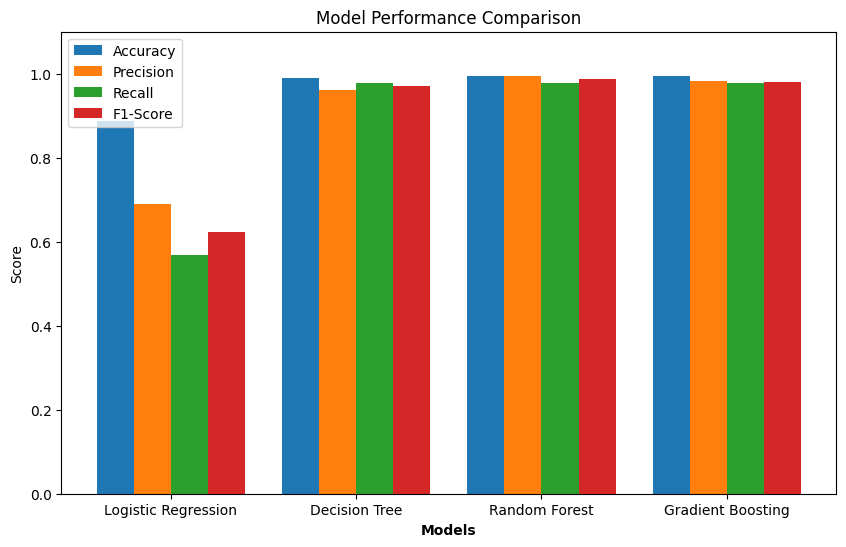

In [57]:
import matplotlib.pyplot as plt

# Convert the result to dataframe
# Convert to DataFrame
df_results = pd.DataFrame(results)
print(df_results)
# Set the metrics to plot
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
x = df_results['Model']

# Bar width
bar_width = 0.2
r1 = range(len(x))
r2 = [i + bar_width for i in r1]
r3 = [i + bar_width*2 for i in r1]
r4 = [i + bar_width*3 for i in r1]

# Create the plot
plt.figure(figsize=(10,6))
plt.bar(r1, df_results['Accuracy'], width=bar_width, label='Accuracy')
plt.bar(r2, df_results['Precision'], width=bar_width, label='Precision')
plt.bar(r3, df_results['Recall'], width=bar_width, label='Recall')
plt.bar(r4, df_results['F1-Score'], width=bar_width, label='F1-Score')

# Add labels and title
plt.xlabel('Models', fontweight='bold')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks([r + 1.5*bar_width for r in range(len(x))], x)
plt.ylim(0, 1.1)
plt.legend()
plt.show()

Plot confusion matrix

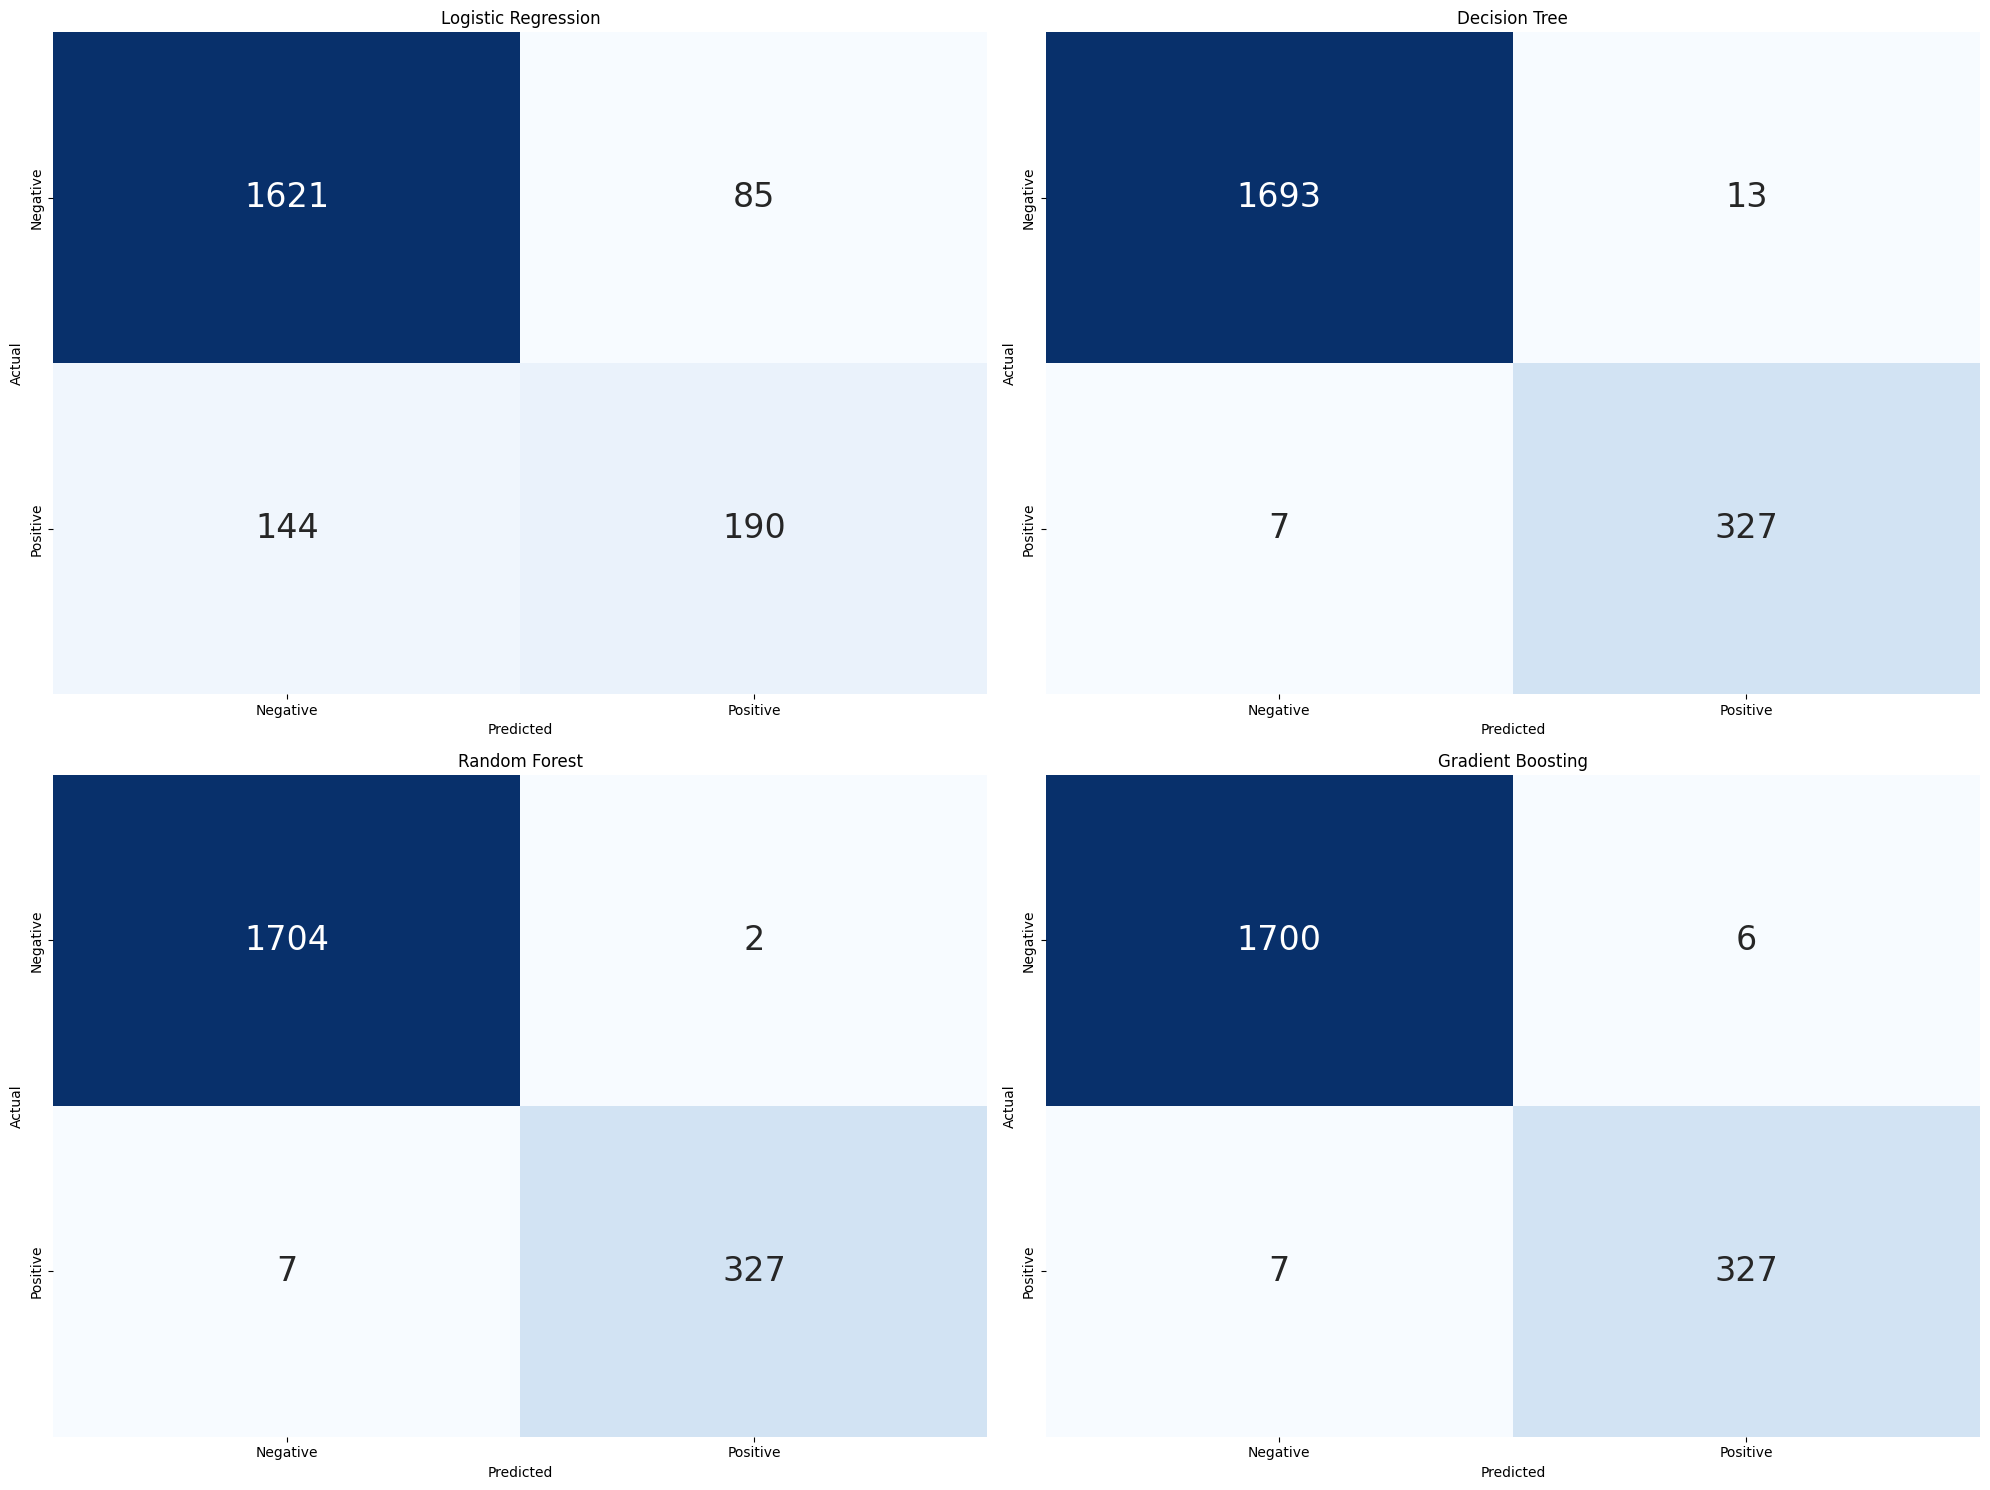

In [58]:
import seaborn as sns

# Define a function to plot confusion matrices
def plot_confusion_matrix(cm, ax, title):
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False, ax=ax,
                xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], 
                annot_kws={"size": 24})
    ax.set_title(title)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))
# Flatten axes array for easier iteration
axes = axes.flatten()

for c in range(len(cfm_results)):
    plot_confusion_matrix(cfm_results[c], axes[c], results[c].get('Model'))


# Adjust layout and display
plt.tight_layout()
plt.show()

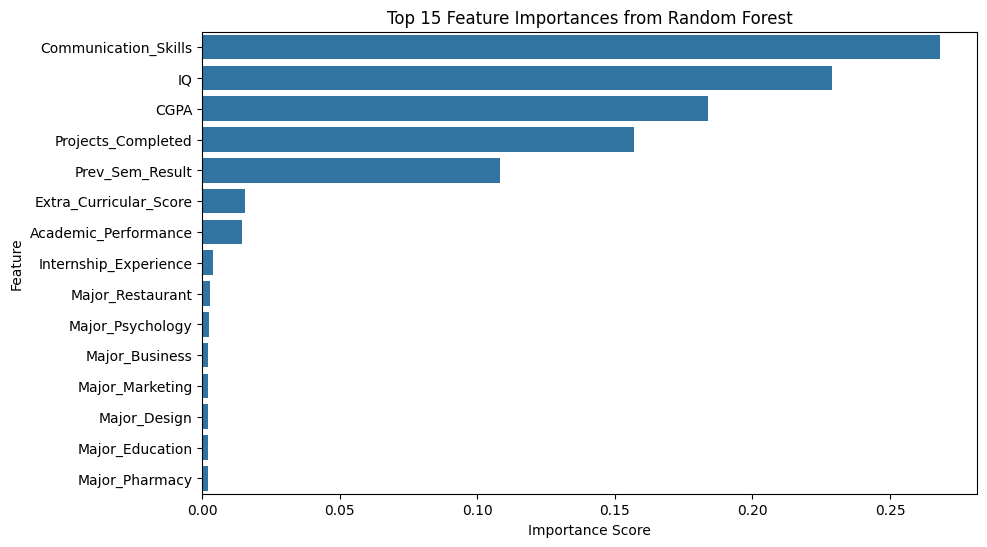

In [59]:
# Feature Importance using Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
importances = rf_model.feature_importances_
feature_names = X_train.columns
# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(15))
plt.title('Top 15 Feature Importances from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

Silhouette Score: 0.3304


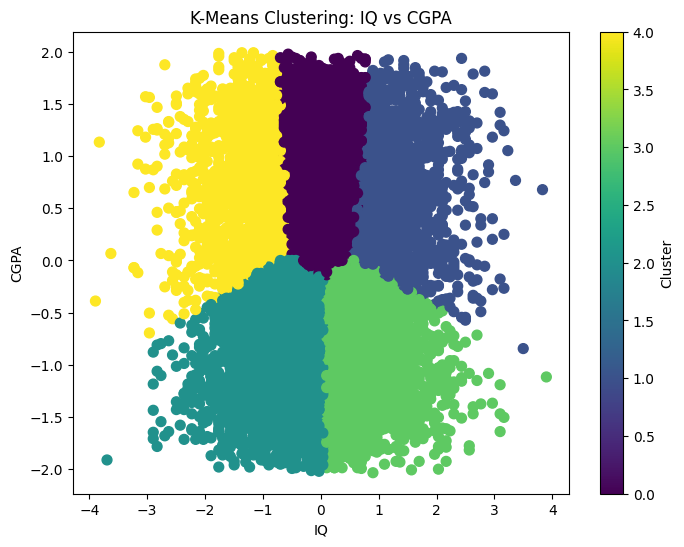

In [60]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score


def clustering_model(x, y, clusters=3):
    # Extracting the relevant columns for clustering
    data = df[[x, y]]
    # Apply standardization, good for clustering 
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)
    
    # Applying K-Means
    # You can change the number of clusters
    kmeans = KMeans(n_clusters=clusters, random_state=42)  
    kmeans.fit(data_scaled)
    
    # Get cluster labels
    df['Cluster'] = kmeans.labels_
    
    # Silhouette Score
    sil_score = silhouette_score(data_scaled, kmeans.labels_)
    print(f"Silhouette Score: {sil_score:.4f}")

    # Plotting the clusters
    plt.figure(figsize=(8,6))
    plt.scatter(df[x], df[y], c=df['Cluster'], cmap='viridis', s=50)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f'K-Means Clustering: {x} vs {y}')
    plt.colorbar(label='Cluster')
    plt.show()

clustering_model(x='IQ', y='CGPA', clusters=5)

In [63]:
from sklearn.semi_supervised import LabelPropagation

# Copy of original labels
y_unlabeled = df[target].copy()
# Randomly select 80% of the rows to be unlabeled
# Return only their indexes
unlabeled_idx = df.sample(frac=0.8, random_state=42).index
# Replace their labels to -1
y_unlabeled.loc[unlabeled_idx] = -1

# Features
X = df.drop(columns=[target]).values
y_semi_array = y_unlabeled.values  # for scikit-learn

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Label Propagation
model = LabelPropagation(kernel='rbf', gamma=20, max_iter=5000)
model.fit(X_scaled, y_semi_array)

y_pred = model.transduction_

# Evaluation (if true labels are available)
y_true = df[target].values
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
print("Accuracy:", accuracy_score(y_true, y_pred))
print("Precision:", precision_score(y_true, y_pred))
print("Recall:", recall_score(y_true, y_pred))
print("F1 Score:", f1_score(y_true, y_pred))
print("ARI:", adjusted_rand_score(y_true, y_pred))

Confusion Matrix:
 [[7849  608]
 [ 669 1074]]
Accuracy: 0.8748039215686274
Precision: 0.638525564803805
Recall: 0.6161790017211703
F1 Score: 0.6271532846715329
ARI: 0.4560337711492604


/Users/macbook/.pyenv/versions/3.11.9/lib/python3.11/site-packages/sklearn/semi_supervised/_label_propagation.py:324: ConvergenceWarning: max_iter=5000 was reached without convergence.
  warnings.warn(


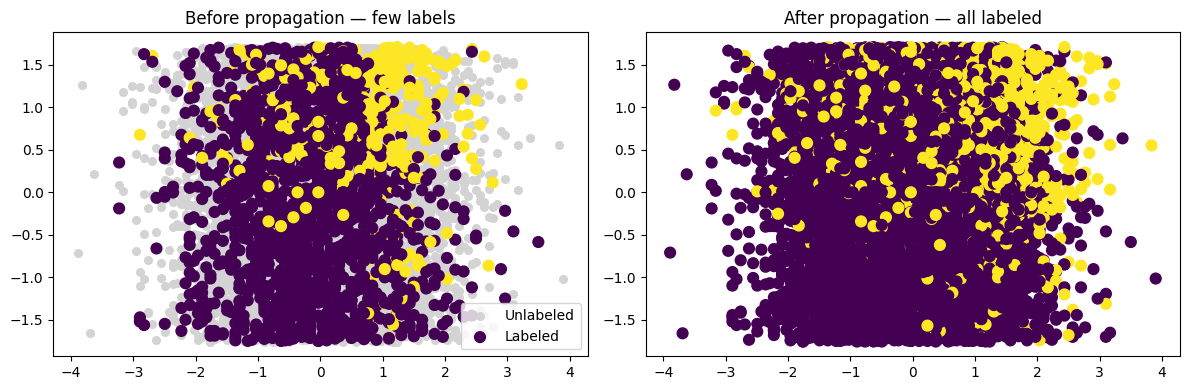

In [64]:
# True labels for colored plot (before propagation)
# Mask: True for labeled samples, False for unlabeled
mask = y_semi_array != -1

y = df[target].values
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c='lightgray', s=30, label='Unlabeled')
ax[0].scatter(X_scaled[mask, 0], X_scaled[mask, 1], c=y[mask], cmap='viridis', s=60, label='Labeled')
ax[0].set_title("Before propagation — few labels")
ax[0].legend()

ax[1].scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_pred, cmap='viridis', s=60)
ax[1].set_title("After propagation — all labeled")

plt.tight_layout()
plt.show()


5.  **Comparison & Discussion**
    - Compare the performance of the three approaches.
    - Discuss their strengths, weaknesses, and suitability for the chosen problem.
    - Highlight situations where each method would be most appropriate.

Overall, we used three different types of learning model for analyzing a student placement dataset. Most of the approaches obtain high metric scores around 80-99%, indicating great performance. Each of the three approaches serves different purposes.

- Supervised Learning models (Logistic Regression, Random Forest, Gradient Boosting) are used to learn to determine whether a student has a potential to be provided future job placement based on their overall college performance (IQ, Major, GPA, Academic Performance, Internship Experience, and more).
    - Strengths: Powerful model for a relatively large dataset with labeled data
    - Weaknesses: Requires a fully labeled dataset; Needs careful data cleaning and imputation; Might overfit the data if it is too small
    - Situation: This is a classification problem with large data and many features. So, we need classification models. Here, we observe that the Logistic Regression obtains relatively high accuracy, while the ensemble models (Random Forest, Gradient Boosting) significantly improve performance.
- Unsupervised Learning models (K-Means Clustering) are used to partition data into clusters, useful where you want to see the pattern.
    - Strengths: Good for learning the pattern of up to 2 numerical variables.
    - Weakness: Applying to all features is not recommended, as you cannot visualize it clearly; Require scaling to work properly.
    - Situation: Group similar data together into clusters based on their axes. Discover natural structures without predefined labels
- Semi-Supervised Learning models combine Supervised and Unsupervised Learning to train a model using a dataset that consists of both labeled and unlabeled data. The goal is similar to supervised learning.
    - Strengths: Useful for a dataset with very few labeled data but large unlabeled data
    - Weakness: Might be slow and expensive; Model performance relies heavily on the labeled sets.
    - Situation: You are given a small dataset with labels and a large dataset without labels. You can combine them and train a semi-supervised model for prediction.